<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# Train an Image Recognition Model with Python

Estimated time needed: **40** minutes

Have you ever wanted to create an image detector that would tell you whether or not a picture is of a certain object? Look no further because we have you covered!

Historically, two major approaches have been taken by computer scientists to answer if an image is of a hotdog or not. They represent two main streams of artificial intelligence. One was to program the knowledge of how to recognize an image's content to a computer system to allow computers to use rules of inferences in the same way as human, the other being constructing a large network of neurons and learn from a large set of real world data with a **simple** learning rule. The latter approach has acheived great success, now known to the public as "deep learning" while the first one is presently being considered by most computer scientists to be a biologically unrealistic idea.

In this project, we will be utilising those simple learning rules to "teach" a neural network how to recognize hotdogs an image and solve the big question: hotdog or not hotdog?

Let's find out!


## What You'll Need

Before starting this lab, it'll be helpful to be familiar with the following:

*   Basic Python knowledge
*   Basic knowledge about image classification and neural networks, provided in optional readings

If you're interested in learning more about image classification and neural networks you can check out the Computer Vision and Image Processing Fundamentals course on [Coursera](https://www.coursera.org/learn/introduction-computer-vision-watson-opencv?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsbuildahotdognothotdogclassifierguidedproject28954781-2021-01-01) or [edX](https://www.edx.org/course/computer-vision-and-image-processing-fundamentals?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsbuildahotdognothotdogclassifierguidedproject28954781-2021-01-01).


## What You'll Learn

After completing this lab, you will be able to:

*   Create functions with libraries and packages to preview, load and train your model
*   Transform datasets to prepare them for training
*   Train a state of the art image classifier using transfer learning

You can learn more about the transfer learning, training a model to solve one problem and applying that training to a related problem, by reading the following article: [Convolutional Neural Networks for Visual Recognition: Transfer Learning](https://cs231n.github.io/transfer-learning/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsbuildahotdognothotdogclassifierguidedproject28954781-2021-01-01).


## Table of Contents

*   [Exercise 1: Get Your Python Toolkit Ready!](#Exercise1)
    *   [Task A: Set Up Your Environment](#Task1A)
    *   [Task B: Set Up Your Dataset](#Task1B)
    *   [Task C: Set Up Your Tools](#Task1C)
*   [Exercise 2: Get Your Tools Into Shape!](#Exercise2)
    *   [Task A: Prepare the Dataset](#Task2A)
    *   [Task B: Set Your Hyperparameters](#Task2B)
*   [Exercise 3: Define Your Model!](#Exercise3)
*   [Exercise 4: Search for the Optimal Model!](#Exercise4)


***


## Exercise 1: Get Your Python Toolkit Ready!<a id="Exercise1"></a>

What should every Pythoneer have in their toolkit? Their dataset, Python libraries and a few custom functions to help with the image classification process. Take a look!


### Task A: Set Up Your Environment<a id="Task1A"></a>

Before we start, let's get your environment set up. We'll begin with upgrading PyTorch, a Python library for deep learning, in this notebook.


In [1]:
! pip install --upgrade torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.6/750.6 MB 539.7 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 1.5.0
    Uninstalling torch-1.5.0:
      Successfully uninstalled torch-1.5.0


Once you have installed that, please restart your kernel. You can do that by navigating to the button shown below:

![Restart Your Kernel](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/build-a-hotdog-not-hotdog-classifier-guided-project/images/Restarting_the_Kernel.png)

Now, let's proceed to check if this environment has a compatible GPU model or not:


In [2]:
from torch.cuda import is_available, get_device_name

if is_available():
    print(f"The environment has a compatible GPU ({get_device_name()}) available.")
else:
    print(f"The environment does NOT have a compatible GPU model available.")

The environment does NOT have a compatible GPU model available.


### Task B: Set Up Your Dataset<a id="Task1B"></a>

Since the networks need to learn from the real world data, the first step is to collect a large set pictures and label each and every one of them as "hotdog" or "not hotdog".

In this project, we have prepared the dataset with labels for you, which can be accessed from this link: [Hotdog Not Hotdog Dataset](URL). You won't need to download our dataset and upload it to our Lab environment manually as our data loader will do it for you.

The dataset we provided stores the mapping of the image to a label ("hotdog" or "not hotdog") inside the `csv` file. This file includes the following information that will be used later in this lab for training the model: `label`, `y` and `file_name`. To get a better understanding of what each of these columns represents, please see the following table:

| Column    | Values                   | Description                                                                                                                       |
| --------- | ------------------------ | --------------------------------------------------------------------------------------------------------------------------------- |
| Label     | "hotdog" or "not_hotdog" | Describes whether or not a image is of a hotdog.                                                                                  |
| y         | "0" or "1"               | Numerical representation of the label, i.e. "0": denotes that an image is of a hotdog, "1": denotes the image is not of a hotdog. |
| file_name | Various Unique Values    | Denotes the path to the images, e.g. `hotdognothotdogfull/hotdog_1.jpg`.                                                          |


### Task C: Set Up Your Tools<a id="Task1C"></a>

Python libraries are helpful in making coding much simpler and easier. Rather than writing code from scratch, you have access to functions that have already been pre-written. You can read more about the libraries we've imported with the [Python Standard Library Documentation](https://docs.python.org/3/library/index.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsbuildahotdognothotdogclassifierguidedproject28954781-2021-01-01).

Let's take a look at the Python libraries we'll be using in this project!


#### PyTorch: The Deep Learning Neural Network Framework

[PyTorch](https://pytorch.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsbuildahotdognothotdogclassifierguidedproject28954781-2021-01-01) is an optimized tensor library for deep learning using GPUs (Graphics Processing Units), CPUs (Central Processing Units) and CUDA (Compute Unified Device Architecture) developed by Facebook's AI Lab. It is an open-source project developed on the basis of Tensor library.

PyTorch provides convenient array computing with GPU acceleration, and built-in methods for neural network model contruction and training.


#### PIL, Matplotlib & Numpy: Libraries for Image Processing and Data Visualization

Popular libraries for data processing and visualization include the Python Imaging Library (`PIL`) for manipulating image file types, `matplotlib` for plotting, `numpy` for arrays and matrices, and `tqdm` for displaying progress bars throughout the lab.

You can learn more about these libraries and their applications from the [Data Analysis with Python](https://cognitiveclass.ai/courses/data-analysis-python?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsbuildahotdognothotdogclassifierguidedproject28954781-2021-01-01) and [Data Visualization with Python](https://cognitiveclass.ai/courses/data-visualization-with-python?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsbuildahotdognothotdogclassifierguidedproject28954781-2021-01-01) courses.


#### Functions and Classes: Create Helpers

Now that you know which libraries we'll be working with, we can create helper classes and functions to help us train our model. We'll import the corresponding libraries before creating them.

##### Plot an Image

During this lab, we'll want to plot the images we have to see what images we have. What better way to do that than to create a function to do just that?


In [4]:
from numpy import clip
from matplotlib import pyplot as plt
from torch import Tensor

def imshow(inp: Tensor) -> None:
    """Imshow for Tensor."""
    inp = inp.cpu().numpy()
    inp = inp.transpose((1, 2, 0))
    mean = array([0.485, 0.456, 0.406])
    std = array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = clip(inp, 0, 1)
    plt.imshow(inp)
    plt.show()

##### Load Your Dataset

Next, we'll create a `HotdogDataset` class. This class will download the dataset if needed, transform it based on the parameters we input, and match the images in the dataset to a label: hotdog or not hotdog.


In [5]:
"""
Hotdog/Not Hotdog training data.
"""
import os
from typing import Tuple
from zipfile import ZipFile
from PIL import Image

from numpy import array
from pandas import read_csv
from requests import get
from torch.utils.data import Dataset


class HotDogDataset(Dataset):
    """
    Child class of torch.utils.data.Dataset.

    This is a wrapper for mapping from hotdog/not hotdog images to the target.
    """

    def __init__(self, dir_name, transform=None) -> None:
        """
        Initialise a HotdogDataset class

        :param dir_name: The name of the folder holding the data.
        :param transform:
        """
        self.transform = transform
        # Download, save and extract the data if needed.
        if not os.path.isdir(os.path.join(os.getcwd(), f"{dir_name}")):
            r = get(
                f"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/hotdog-not-hotdog/data/{dir_name}.zip")
            f = open(os.path.join(os.getcwd(), f"{dir_name}.zip"), mode="wb+")
            f.write(r.content)
            f.close()
            with ZipFile(os.path.join(os.getcwd(), f"{dir_name}.zip"), 'r') as zip_ref:
                zip_ref.extractall("./")
                zip_ref.close()
        # Load the metadata.
        self.data = read_csv(os.path.join(os.getcwd(), dir_name, f"{dir_name}_labels.csv"))
        # Number of classes.
        self.n_classes = len(self.data['y'].unique())

    def __len__(self) -> int:
        """
        :return: The length of the training/testing dataset.
        """
        return len(self.data)

    def __getitem__(self, idx) -> Tuple[array, str]:
        """
        Return the input and target at a specific index of the dataset.

        :param idx: The index of the data to be returned.
        :return: Key-value pair at the specified index.
        """
        # Open the corresponding Image.
        image = Image.open(os.path.join(os.getcwd(), self.data.loc[idx, 'file_name']))
        # Retrieve the label.
        y = self.data.loc[idx, 'y']
        # Transform the image if necessary.
        if self.transform is not None:
            image_ = self.transform(image)
            image.close()
        else:
            image_ = array(image)
            image.close()
        return image_, y


##### Create a Training Framework

Finally, we'll create the `ClassificationModelTrainer` class. We'll use this class as a framework to train, validate and test the model. An advantage to creating this framework is that it provides a convenient method to train our model with the desired hyperparameters and view the output and training metrics that we want to see. We'll talk more about these metrics later in this project.


In [6]:
"""
A training framework for classification tasks.
"""

from copy import deepcopy
from typing import List, Tuple
from os.path import join
from os import getcwd

from matplotlib.pyplot import subplots, show
from numpy import sum
from torch import argmax, device, cuda, save, load
from torch.nn import Module
from torch.nn.functional import softmax
from torch.nn.modules.loss import _Loss
from torch.optim import Optimizer
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm



class ClassificationModelTrainer:

    def __init__(self,
                 model: Module,
                 training_set: Dataset,
                 validation_set: Dataset,
                 batch_size: int,
                 minimising_criterion: _Loss,
                 optimiser: Optimizer) -> None:
        """
        Initialise a classification model training module.

        :param model: The model to train.
        :param training_set: The set of training data.
        :param validation_set: The set of validation data.
        :param batch_size: The batch size for training.
        :param minimising_criterion: The loss function.
        :param optimiser: The algorithm to perform minimisation task.
        """
        self._device = device("cuda:0" if cuda.is_available() else "cpu")
        self._model = model.to(self._device)
        self._train_loader = DataLoader(dataset=training_set, batch_size=batch_size, shuffle=True)
        self._validation_loader = DataLoader(dataset=validation_set, batch_size=batch_size, shuffle=True)
        self._minimising_criterion = minimising_criterion
        self._optimiser = optimiser
        self.training_loss = []
        self.validation_acc = []

    def get_model(self) -> Module:
        """
        Getter function for model.

        :return: Return the trained model.
        """
        return self._model

    def train_model(self, n_epochs) -> None:
        """
        Perform the model training.

        :param n_epochs: The number of training epochs to run.
        """
        # Setup the progress bar.
        pbar = tqdm(total=n_epochs * (len(self._train_loader) + len(self._validation_loader)))
        pbar.set_postfix({
            "Training Loss": "Not yet available" if len(self.training_loss) == 0 else self.training_loss[-1],
            "Validation Accuracy": "Not yet available" if len(self.validation_acc) == 0 else self.validation_acc[-1],
            "Epoch": 1
        })
        # Training through the epochs.
        for epoch in range(n_epochs):
            loss_sublist = []
            # Training Process
            for x, y in self._train_loader:
                x, y = x.to(self._device), y.to(self._device)
                self._model.train()
                z = self._model(x)
                loss = self._minimising_criterion(z, y)
                loss_sublist.append(loss.data.item())
                loss.backward()
                self._optimiser.step()
                self._optimiser.zero_grad()
                pbar.update()
            self.training_loss.append(sum(loss_sublist))
            # Validation Process
            correct = 0
            n_test = 0
            for x_test, y_test in self._validation_loader:
                x_test, y_test = x_test.to(self._device), y_test.to(self._device)
                self._model.eval()
                z = softmax(self._model(x_test), dim=1)
                y_hat = argmax(z.data, dim=1)
                correct += (y_hat == y_test).sum().item()
                n_test += y_hat.shape[0]
                pbar.update()
            accuracy = correct / n_test
            self.validation_acc.append(accuracy)
            pbar.set_postfix({
                "Training Loss": self.training_loss[-1],
                "Validation Accuracy": accuracy,
                "Epoch": epoch + 2
            })
        pbar.set_postfix({
            "Training Loss": self.training_loss[-1],
            "Validation Accuracy": self.validation_acc[-1],
            "Epoch": n_epochs
        })

    def plot_training_stat(self):
        """
        This function plots the training statistics the model trainer collected 
        throughout the training process. Namely, they are

        - Total training loss versus Iterations, and
        - Validation Accuracy versus Iterations.

        The two statistics are placed in the same plot, respectively in red and
        blue.
        """
        # Plot Total training loss versus Iterations
        fig, ax1 = subplots()
        color = 'tab:red'
        ax1.plot(self.training_loss, color=color)
        ax1.set_xlabel('Iterations', color="black")
        ax1.set_ylabel('Total Training Loss', color=color)
        ax1.set_ylim(bottom = 0)
        ax1.tick_params(axis='y', color=color)
        # Plot Validation Accuracy versus Iterations
        ax2 = ax1.twinx()
        color = 'tab:blue'
        ax2.set_ylabel('Validation Accuracy', color=color)
        ax2.plot(self.validation_acc, color=color)
        ax2.tick_params(axis='y', color=color)
        ax2.set_ylim(0, 1)
        fig.tight_layout()
        show()

    def test(self, testing_data: Dataset) -> float:
        """
        This function tests the model's performance on a given dataset.

        :param testing_data: The dataset to perform testing upon.
        :return: Model's accuracy on the given testing data.
        """
        _class = ["Hot dog", "Not hot dog"]
        j = 0
        total = 0
        print("Here are a list of inaccurately classified results:")
        for x, y in DataLoader(dataset=testing_data, batch_size=1, shuffle=True):
            x, y = x.to(self._device), y.to(self._device)
            predicted = argmax(softmax(self._model(x.to(self._device)), dim=1), dim=1)
            if predicted != y:
                j += 1
                print(f"Actual: {_class[y.item()]}\t\tPredicted: {_class[predicted.item()]}")
                imshow(x[0])
            total += 1
        return 100 - 100 * j / total

    def dump_to(self, file_name: str) -> None:
        """
        This function dumps the trained model. 

        :param file_name: The directory to save state files.
        """
        save_path = join(getcwd(), file_name)
        save({"model_params": self._model.state_dict(),
              "optimiser_stats": self._optimiser.state_dict(),
              "acc": self.validation_acc,
              "loss": self.training_loss
              }, save_path)
        
    def load_from(self, path: str) -> None:
        """
        This function loads the dumped file back to the training framework

        :param path: The path to the dumped file.
        """        
        state_dict = load(path, map_location=self._device)
        self._model.load_state_dict(state_dict["model_params"])
        self._optimiser.load_state_dict(state_dict["optimiser_stats"])
        self.validation_acc = state_dict["acc"]
        self.training_loss = state_dict["loss"]


Now that we have our Python toolkit loaded and ready to go, let's start working with our dataset!


## Exercise 2: Get Your Tools Into Shape!<a id="Exercise2"></a>

Before we start training, let's make sure our tools and materials needed are prepared. To do that with our dataset, we'll transform the data and create a `HotDogDataset` class before training the data. In the context of machine learning, that means we'll prepare the data by loading it and set up our training framework defined above.


### Task A: Transform the Dataset<a id="Task2A"></a>

Now you might be thinking, won't the model only be trained to recognize those exact images with this dataset?

This is where image preprocessing comes in. We want to train the model with more data. One way to do this is to create copies of the image and transform those copies. This process helps the model recognize an object rather than only the picture itself. For example, we can vertically flip an image. The object in the image does not change. If we rotate that image by 5 degrees, the object in the image does not change either. It is either a hotdog or not a hotdog.

To do this with our dataset, we'll create a transformation process called "composed". This will create copies of the images that are resized, horizontally flipped and rotated. We'll also convert the images to a tensor and normalize its image channels.


In [7]:
from torchvision import transforms

mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
composed = transforms.Compose([
                               transforms.Resize((224, 224)),
                               transforms.RandomHorizontalFlip(),
                               transforms.RandomRotation(degrees=5),
                               transforms.ToTensor(),
                               transforms.Normalize(mean, std)
                               ])

With the handy class we created earlier, we can now create a `dataset_full` object, an instance of class `HotDogDataset`.


In [8]:
dataset_full = HotDogDataset("hotdognothotdogfull", transform = composed)

Let's split this training dataset into three separate parts: training, validation and testing. You might be wondering, why do we split the dataset like this?

Think of it this way: the training set is similar to practice questions offered in school. They help you learn and get better at answering the questions. The validation set is similar to a midterm, used to confirm your knowledge and offer you feedback on how you're performing so far. Finally, the testing set is similar to a final exam. It tests you on how well you perform after the entire learning process when faced with questions that you may have never seen before.

To train the model, we'll be using data from the first portion of the training dataset. To valdiate that data by calculating metrics such as validation loss, we'll use data from the second portion of the dataset. Finally, we'll test the model with the third portion of the dataset by using images it hasn't seen before.

Below, we're using 70% of our dataset for training, 15% for validation and the remaining 15% for testing.


In [9]:
from torch.utils.data import random_split
from torch import manual_seed

manual_seed(0)
training_size = int(len(dataset_full) * 0.7)
validation_size = int(len(dataset_full) * 0.15)
test_size = len(dataset_full) - training_size - validation_size
training_set, validation_set, test_set = random_split(dataset=dataset_full, lengths=(training_size, validation_size, test_size))

Feel free to adjust the training sizes as you wish! See what happens when you make the training, validation or testing sizes smaller (or larger)!

With the function we created earlier, we can preview one of the images. Let's take a look at the first one!


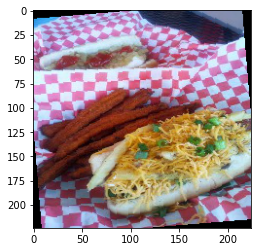

In [10]:
imshow(training_set[0][0])

We can see that the image shows up properly. Great, let's keep going!


### Task B: Set Your Hyperparameters<a id="Task2B"></a>

Hyperparameters, such as the batch size or learning rate of a model, are parameters that can be adjusted to find the most optimal hyperparameters for the model. Typically, you would have to tune these hyperparameters to find the best ones, but we've already done that for you!

For this model, we will set a batch size, learning rate and the number of epochs. The batch size is the number of sample images used in one iteration of training the model, the learning rate is how much the model will change between iterations and the number of epochs is the number of times the model will be trained over the entire dataset.


In [11]:
# Batch size: train set  
batch_size = 50

# Learning rate  
lr = 5e-3

# Number epochs 
n_epochs = 25

Now that we have our datasets and hyperparameters set up, let's start training!


## Exercise 3: Load Your Model!<a id="Exercise3"></a>


Let's begin to define our model by loading it. For this lab, we'll be using the pre-trained model, ResNet18, a state-of-the-art image classification network by Microsoft. To load this model, we'll be using the following code, with the parameter `pretrained` set to `True`.


In [12]:
from torchvision import models

model = models.resnet18(pretrained = True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/jupyterlab/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

The original network was designed for classifying the image to 1,000 different classes. In our case, we only have 2 classes. For that reason, we'll replace the final layer to reduce the number of neurons from 1,000 to 2. Consequently, we'll need to retrain the final layer.

To achieve this, we'll "freeze" the existing model parameters and replace the final layer.


In [13]:
from torch.nn import Linear

for param in model.parameters():
    param.requires_grad = False

# Next, we set `n_classes` to the number of classes we have. 
# Recall that we have two classes: "hotdog" and "not hotdog".
n_classes = dataset_full.n_classes

# Now that we have those parameters set, we can replace the output layer, 
# `model.fc` of the neural network, with a `nn.Linear` object to classify 
# `n_classes`'s different classes. For the first parameter, known as **in_features**, 
# we input 512 because the second last hidden layer of the neural network 
# has 512 neurons.
model.fc = Linear(512, n_classes)

## Exercise 4: Search for the Optimal Model!<a id="Exercise4"></a>

With your toolkit assembled, tools prepared and model loaded, it's now time to put them to use by embarking on a journey to search for the optimal parameters. This will result in a model that will ideally have a high accuracy, meaning that it will more often than not detect when an image is a hotdog or not a hotdog correctly.

To search for the optimal parameters, we must first define a metric to measure what is optimal. In machine learning, this is done by defining a loss function. A more optimized model will have a lower loss. Since this neural network is designed to perform classification tasks, cross entropy loss (a loss function) becomes the natural choice to construct the model.


In [14]:
from torch.nn import CrossEntropyLoss

criterion = CrossEntropyLoss()

After defining the loss function, we must find a way to get the parameters that will minimize the loss function. This task is accomplished by optimizers. In our model, we'll use the Adam optimizer, invented by Dr. Diederik Kingma and Professor Jimmy Ba.


In [15]:
from torch.optim import Adam

optimizer = Adam(model.parameters(), lr = lr)

Now that we have everything we need to train the model, we can set up our training framework:


In [16]:
trainer = ClassificationModelTrainer(model,
                                     training_set,
                                     validation_set,
                                     batch_size,
                                     criterion,
                                     optimizer)

Let's start training!

Due to our limited computing power, we have trained 25 epochs on your behalf on a machine with CUDA GPU. In the following chunk of code, we will load the trained model and training statistics back into this Python runtime, and you will train another three epochs before we stop. This will take a few minutes.

![image.png](data\:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAzYAAAAZCAYAAADjXbs/AAAR/UlEQVR4Ae1d643jOAy+VlLTNXCp4Bq4v8ECd5UEU8pi6lhgm/CBpCjxJVmOnZl4hgssIlsSHx8/UpLzmD+W/JcIPAmB32/X5fLj/UnSP0Dsz9tyudyWQz0Amdf78vuZ5v+6L9fLZbn9fKaSlD2PwO/lfr2cOxfmnW0jMX+uy/1Xu7Xeel9ul61z1qU+fUSU11H9yNzcHorEbDtmazMivq7Nyf5E4CQI/HESO9PMEyJw+oPNsizvPw7ekD51QSkb6DzUvEy2YA5cDubQy3jXMwQOJ5fl8tAB5ZwHG4yzeWCBtaPey9zssaV/PzHrY7OjBw+KJ3x4sMPlnPq9EMiDzfeK92He1g0bbmBgEyP/U9H8CgebZaHF9bB3P556sDksvKcRhJtHxT3Jw4PfbTsNKmc29JwHG64Tqg7WQ82Z45G2b0KgvLukeCDq0/Xtqe/VT5kKNfOw9WxKYw5KBD4WgTzYfCzeqS0RSAQSgUQgEUgEEoFEIBFIBJ6AwGkONmvvEPz3j3xSa9t/L3+Lpybuacpff5p3HOT867JL9j//4vcdnM5iz59/SV22vWL3iuxXeDr0BM6myEQgEUgEEoFEIBFIBBKBRMAhkAcbOGDkwcYRI28kAolAIpAIJAKJQCKQCCQCZ0LgRQ828L0G/eW2fMfGvptzWS5b3rGBz/7mZ77PlJtpayKQCCQCiUAikAgkAonABgQ+9mAjvljXPiYVfTk7Dzb00bUDP4p2goMNfKmx8WIDi58xVHAVYpFftnwGyN9EJnNp50+fv1R+7A5d+eW0Bx+20I9G6Idfu01KAedCgPMKP9bd+6GQSZ6hrJ6MB2Fh+3bm/YPac1oi8DwEPvlHkKj+l4f9QX4NDjajglD6yvdE3GYUnC598ic/68Isikj8y1l5sHm5gw3H1JBIEcxuUriwVy4MfvZWcMJlY6ibDsSVZ8au6B2+TYeTkT3Lsmj5wYLIvhu7nG/uxtgvGj7KTSdQ3RjbPaNbidMXHCeMt9107pStNW260j5TMdzEBdTG9j/g14gLKzyrjs6OqxMeb0R4YZ7Z/H5cBfyQOv0k9IMyP+dgAzbb+O8C4bjJw9xbU6PXc/23u5j3/ImBo/wnnT4PSZ+/P/BhmBuTPBvKiHXX/UzcvSwoc7Dm9eYdcJ/X5U04HqD3dUVojrs964rhjCfvNyquKu84R3TM1dwH611sns3NR9e2WPrwLvi9xxeFW1xT1DrU0YVjgj1WfLBBpbflDn9g0QkkMCsxSvLWQON1M5SMo40fBBjHcRHhV4cg6GgyoFs5KTfKZRO16wv+3+E7NoC1i6UDvnMDisJ1uf0wf3ATeFJJVZKsXi9U2Cd1Qnwrp5QVsW49noqWnK/7lcC5iy43l2Up+cF/uBMLl/ATuXq9L/cH/gaOttv7xbrj3NSuoR0yHit2ox91fKBbi9dXiFfLWdQt/rjpLtla0+Yrjenm6TiBsLy5je1uv0Y8E6Ye4YMQN9kkDtTaPjnr6w4DPBrHX8dPsKs9XLG5N7aT6raMsea0mW1qiOnddBnqmcwHpeiROUpAWasEhrY7ugb75ZoTjfmce4UPan3+HEteQ+vKnnXFSKr9vNr79V9PN7pUDII9kp688crn7kYBjw8Hv8SeZ5ug9XqFtWFCvotNMSQ42LwvtyIQJ1nhQWGTBUq2SQc4IQ80dKq8vr3jX+OWBbWBAwHTCwgVa3EiVoebnb9clgebBn3Q4pj2SMRTHF9gwbH84cHqFTii483ds7p5HM8DW3YtOt3F0hQuUIhji/3QLocDaxPbBq/E59hnOU7LWMlNMRHnqYV6wm4TAxdPkI+++gVd2wkDbd5rX0PZwv4jm8dwAew3PJVxLwZbvygOXPPk37AgfPgJYHvVOJFYo7eCY2RM5VqdPNEg+a5Go9+wkRb6jW7EodZo7ZPqqwdpNgdk3pb3wjP3TpG8r/gN83ndEHbZMWo+ryftUMBWxK8gV/uixlnZ1jdcO1mnzyGFC6+ZSsHkBdoxsFOJ8T6hHdZ2noOyZ/HiSZ3XYC/hdBvMHBdBdMcmhWfkj5Gt36niGs3xangquZXj/af00TpkZTS/JjjcgbPeBr8wH0su1Q5uyPy4uA1q17YqV8ppuOBDN9Ar80DhTmtQrXWmZoDUWDfZ2zCCkdE9tsu8Ypw1Z/16ZeaISxirYtjhG04Z9bF/gd9C3YYm4alxadMBS7BbrkF67JgHICmORzncXe/LO7z5UXJAYdTMWG8hZoJHcD2JEdqnOEbqgoNNswMnGQVWUHUcx1mgG5Gd00C2wCDSDvOEowHADCa95sFG4xFspDaQpTFAP52wsVfjOEaSL5M6u3JFQeqOKUbYQgXjHeeswaNrTDZdDGk4FAPJzVYcdNFYqKB0OI7+KDmxMdYvHoXzJdbcUf6gqH+asmK3XbQQe+CRwQBxMYXe/RFTk/ezsqsPxzb2cYF8IS4ZDDf45RZHdrHLMx5QFpeAR12ZberOFnHb8poPt+1jxmbcr/tyE3+IsMdVvO/8IlmNd0Y2exTixrzj/JSxg4nmGjnOY1nw6BVs6Y23dtJ1q0Gjuf3N+ciabh9i07PTz8Iaw3le8tvFvEyLY+Zlzt2xmFF8mu735Sb5gfEy9QgUhVxoFoQ2W4ysjAkOz+RfOMb6oXi4xuHmV6/VdFo8YYblpZaCWDEXdBd9UkGtOYbT6IdYMwzGv99uy/0XCzW5yPuHjm7k6AwXWLx4tfEnH/2BTkzRzeIX8bLER9oiRjfsxU3RRN0KQ9G5uRnFtwlhP2sNUryz+Hu/aH6Qb6CCY804KNnNhqmW4wl8MuiOb3zwvrb6YASijWyD6Hv8YMOOQZBqUWhAIxEvtAHyyk1CCIOoCXJ0YeYgsaP6NQ82Go+jDjYtnhAXH0cROOSA+ZJ9uddsi5JE62gS9f2hbuTiCl8C8jddQaty2vYxd8k+8A0KXlTQXDG2otauA794CuLhCiQtWvEDgxW7QVfNZV6ceA5r7b22WIV5v0t2T+f8fVc7tnCBbUd1Bg/uqzwHfpsxxcyIH9jV5Rn717DlO/yKWDsOcO8Rr+CLyWkQW/xtG9CY/9WCjo9xTnv8QuxCmR4rpQPnyDrR8a8abhveNh4R5iPzAweRrt4CHWHKsnkz2uoo1Xf/8AJmlLq0heMwDWzFJ68SH7aAbO/387jtr8hhtjWMqZTZwX9lnuJAEec4tSIjOjw5GdLUnh57uHbjVjgc6NC3NEbW95CnVQDFWeZ17YKG4jPc0LqIQ5I/3hcpT9u2otvER2NPc3v5UfUwx+s6F+1HpIWy3XSMc3ggE30I6qlUs6ldcl2+aygevFS/q0wRL8TC2KowXonHkAsNKxWTcK3y9QprgvBjVBu9j+TsYwcbAFIaWZ1sQMvgaxK2RZAcgCItkwEMAzn6HjqgAliKeynG+R0biQe1ZQyQHDJmlez9hiWNvW4zichKX+usLYqhSabKnToMG1aXva6jp4qFT546v9dQSS4HtaRtCwDJb9c0HvnNi7YUMdNe8QvxsPHEYqU/EtFUrdjNc+UTsy4GTSq1VvJ+l2yra+/1Fi4AZrIOmesNftkaWL1Ywxh02DjXyQ13WEAs/+qwhxvEGSd3zWbeXKt6bfK++6DEYAzbJ/tREPAntMHnoa4b5E+tUxg/b1cfLm8bj9V6yl0bO7SZ63Sgt/LJrK+sZOIVa06XL7EANafYUDFyUzqccOMmb4gYRBiibYpHMh+LjpALTX9PrvLRydC5RRs0HbOQl00ttvwYz1EY2Mb5/sh+o6ZdhpxrdiOevTUJMQjwZelWdnSwGXFP8b/kAduyprvUFKpFwMHmE5vXe0X8gEPSNudLbzYf+hkX4r+SVaYOsV15p2ygfdDluSIHe96I3I38lzmwFg83H2QzRtKKcRsxk3FRudDmtvxo96DlfaT+zQcbOpVrUknhPrgGfAZEgAjzVZHJg015evaZP/dMcVMn7rrASAKXROcCpXmnr0TMuSMm7KRulGc/FsWS9avkqO7pXAW20kiyTfM1TmqfCx1d9vaEX+iPKQjSPl94V+xGnTKu0RM6a2i79r6SPlyIdspuWo5pTXMBalXlPG9IxYK8wa+Y570NevOzO68NoVbhjDuE2HGbrsVCKOehLr0GyG7kguRmZ3wcB59LIQahTMG5YpDWQf0yptvw8rax31E+RvfU+MHmTGNIcZB2Y1tiXDYE7SN8rGnlFXEM8n7FNl3/VnQMu5ljndgpOzr4h1xoSjUH6L7jlJGh8Y/z1MloKmvLjyE/NX7yXgeHmfW1csDUKvHQI8KiGmsPKq2DWrx3q/dNPFx/HQiW4bu/0m9ti5Elp5Z2HQ96FB4ku5sfWMd1vaqyAj36lowN95A+VTuiPOLhxXdtc+3c0fBckcK8jwLjABO9txdjpVBuu1jL8YRPNx5FBuaYym/q8HbLgz8b0B8LPdsPNi5I5EQNMgImnh4qAIXzopDEya+LLTrb22Rc8qNojkTlY4CVBoC3WQhr32TDE64QWBWZnjBKQpXcggO9WXzf6ca5c4ea0VuZLN+9DmwjLjZ+4nWALSZuBxsro+qf9Kunk+VERcPq1DJKfKofUUHnBT7AfZj3k7KLDMURduio14JvrVdFLuEl6laoT9Qv7J/0q/MUilSY+in1Djgoh43kzPnlpY1kxu+WNBma9wWjyQXMfbylh12IDemSsUWOcw4Cvyq/m73zLRt/MdPxahBXmKbWRSGnNHVu+n57J8p3PYbj0OoW9ju7aRPRxQnHGxliQy2x1/r7V2j79bpcDUcsBuSj173GR8WBYoaWTbGSh8IZDmsZsX8gR27mYRTOk74qLqxwOFbDXoU/yKR8CeItReLYXo4EdqpP2wzzy+RDsUPW+qFuNJLy72o+zSPtj9slvlwHyh7WchX1i0MgySp5U+dy7moeKoyVEVa36iwXndyMhqp7niuy2/Je40t2NW6SrHa9UgdcrCk27TtU0hLfJqz1YbOOsjXGXteBm96xYZDNqV+RvQSrHDQsQaho8/xmPDjjgEMZbQzZDDZo4lAxYJn2NQ82n3Gw6cWE+WD7ZewhzjbxBF9d046lxPA8oMSyHNZccsKjG5hMlpdtoPJtkBs1LrIwsu/BW7fb/Cr+K/3GxlBvb57GzcYLJZcFKezDhY9jYrGbkM0PTTr+NM+2tLRetRALMYw7c1d0iWZUvLV8jYuuk8wFPYYXSsatcdVyXhhSn4CyTHh1cmFCiUnYpwUGV2S/w2QlN/hBAtt2e7uLTavGi8e0DY7HWK4bKu/qgy7mGsmW9moMY91yfACCuBXFs8XL+q0wV7kBsRbzaj1gDsAr+yTU95olJyuWjIvKffZd60WR1jaVf9bnYD4I2cMz1q/sBaFa9/Xtrj7uMsOFPiaMB8cCdAnMDaaawxwIKUN+BFjbzTZIPmjbJaYkU3JSc5h1B6+9vER8+77ZQyzXQrZb2iL7bj/BT2E76FHc0TZqn8ufEzExl/JBv9QN0rB/oENrlFc6JlZulR3otDy0uUvcFzgItdrnlt9WP4+z94WooGn4Z/bjLJPj6GOjMWk1uKnqxsPF2nChifAtk1vVPskFrgnoU4wtCEYf5byibfiOjbfoo+5AwLQzLkhcvIvj+R2bljRMFFlIcdF9qCA8K+YbEuFZJozk9haJ0Zzs24lAKdRBodop+ITTD8qPsohsWzBPCNeMyW4x5g252PTNyMkxHoHkmcck7xyOAGy01b7mcA2fJBA38nrPu9eS3qZ/r9xXmt/zMQ82cDDKv2PzSlx9DVvyYPOhcagPLvJQcxDu7WleHmoIUuSYebjz+BPgg8J0ejHJs9OH8CwO4Ob/qz2E4HdNjj3UQEh7m/6zhHvGzp6PebDJg80Mf77fmPIEkt/9ys3h96NAevzVEGibcM5r//GMr+Zz+pMInByB+rGk4zf/J0dmaH5v0z+cdJJO9RG54GHoix5sPLoYJPXxM/nRq/yOTV2oBUZf8i1bT428kwgkAolAIpAIJAKJQCKQCIx/FS3xSQQSgUQgEUgEEoFEIBFIBBKBROAMCJzmHZszgJk2JgKJQCKQCCQCiUAikAgkAonA5yCQB5vPwT21JgKJQCKQCCQCiUAikAgkAonAgQjkweZAMFNUIpAIJAKJQCKQCCQCiUAikAh8DgL/A2+TS0uZRYosAAAAAElFTkSuQmCC)


In [17]:
r = get(f"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/build-a-hotdog-not-hotdog-classifier-guided-project/twenty-five-iters.pt")
f = open(os.path.join(os.getcwd(), "./twenty-five-iters.pt"), mode="wb+")
f.write(r.content)
f.close()

trainer.load_from("./twenty-five-iters.pt")
trainer.train_model(n_epochs = 2)

100%|██████████| 34/34 [02:49<00:00,  4.68s/it, Training Loss=3.25, Validation Accuracy=0.826, Epoch=2]

Your model has been trained!

In the past few minutes, your model gradually learned how to distinguish if an image included a hotdog in it or not.

Along the way, we measured how well it learned. Let's take a look!


100%|██████████| 34/34 [02:58<00:00,  5.24s/it, Training Loss=3.25, Validation Accuracy=0.826, Epoch=2]


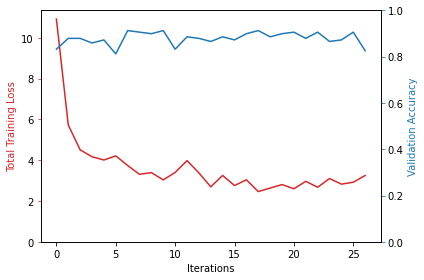

In [18]:
trainer.plot_training_stat()

There are two curves on this plot, one for the training loss and the other for validation accuracy. Training loss measures how familiar the model is with the data we have provided it for learning. Validation accuracy measures its ability to correctly classify whether an image it has never seen has a hotdog in it or not.

Now it's time to send the model in for its final exam: can it ace the test set?


Here are a list of inaccurately classified results:
Actual: Hot dog		Predicted: Not hot dog


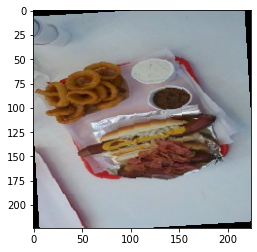

Actual: Hot dog		Predicted: Not hot dog


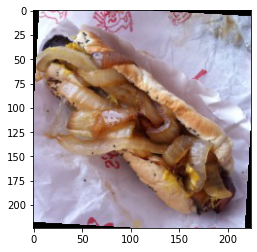

Actual: Hot dog		Predicted: Not hot dog


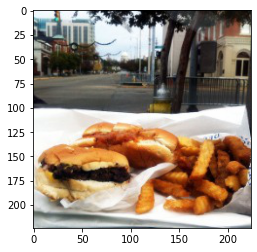

Actual: Hot dog		Predicted: Not hot dog


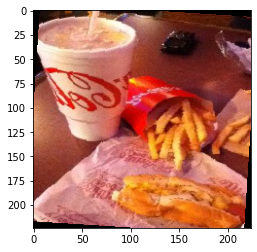

Actual: Hot dog		Predicted: Not hot dog


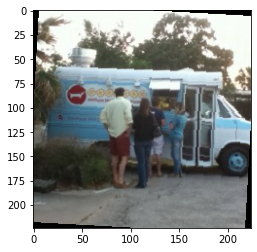

Actual: Not hot dog		Predicted: Hot dog


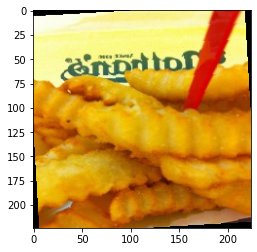

Actual: Not hot dog		Predicted: Hot dog


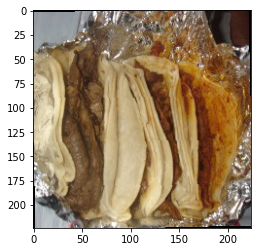

Actual: Hot dog		Predicted: Not hot dog


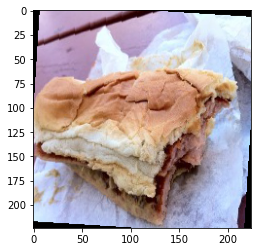

Actual: Hot dog		Predicted: Not hot dog


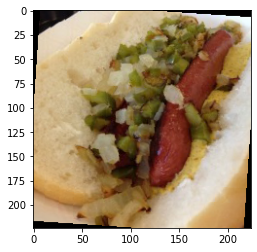

Actual: Hot dog		Predicted: Not hot dog


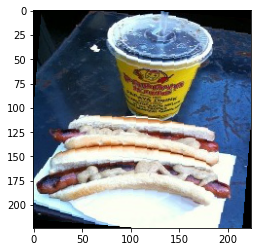

Actual: Hot dog		Predicted: Not hot dog


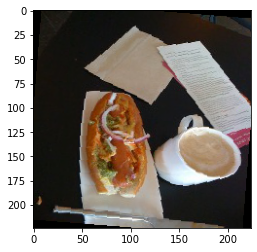

Actual: Not hot dog		Predicted: Hot dog


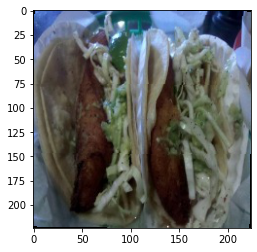

Actual: Hot dog		Predicted: Not hot dog


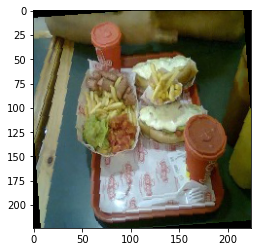

Actual: Hot dog		Predicted: Not hot dog


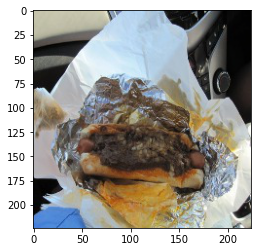

Actual: Hot dog		Predicted: Not hot dog


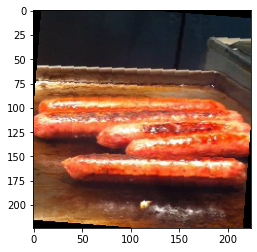

Actual: Hot dog		Predicted: Not hot dog


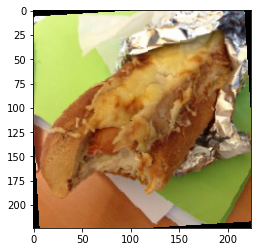

Actual: Hot dog		Predicted: Not hot dog


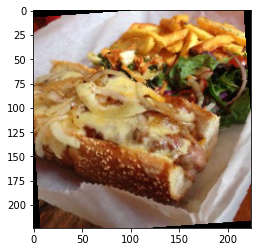

Actual: Hot dog		Predicted: Not hot dog


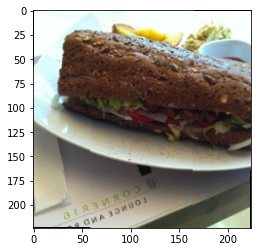

Actual: Hot dog		Predicted: Not hot dog


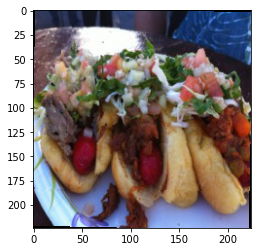

Actual: Not hot dog		Predicted: Hot dog


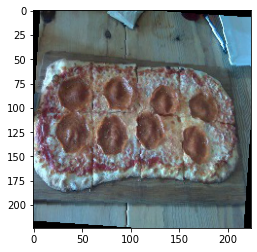

Actual: Not hot dog		Predicted: Hot dog


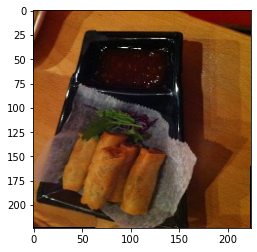

In [19]:
accuracy = trainer.test(test_set)

The images it identified incorrectly are being printed in the output above. To see what it scored overall on the test set, we can print out its accuracy:


In [20]:
print(f"The model reached an accuracy rate of {accuracy:.2f}% on images it has never seen before.")

The model reached an accuracy rate of 86.09% on images it has never seen before.


Great work!

You have successfully trained your model and determined it's accuracy. Now, let's see what you've learned along the way!


## Exercise 5: Recap!

What did you take away from this project? Let's take a look!


### Question 1: Based on the training curves, do you think we have provided with you a valid model construction? Why or why not?

<details><summary>Click here for a hint:</summary>
Take a look at the validation accuracy. Do you notice any patterns (or lack thereof)?
</details>

<details><summary>Click here for the solution:</summary>
This model is considered valid since we don't see a large variation of the validation accuracy as the training proceeds. That is, the validation accuracy doesn't take the form of a rollercoaster. Additionally, the model achieves excellent validation accuracy (greater than 85%), meaning that it is a valid one.
</details>


### Question 2: Based on the training curves, do you think the smaller the training loss is, the better the model performs?

<details><summary>Click here for a hint:</summary>
Looking at the plot we created with the training loss and validation accuracy, do you notice any trends?
</details>

<details><summary>Click here for the solution:</summary>

Nope! A smaller training loss doesn't mean the model performs better. As you can see, the training loss decreases while the validation accuracy stays at the same level.

If you'd like to learn more about why that might be, check out the following course [Machine Learning with Python](https://cognitiveclass.ai/courses/machine-learning-with-python?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsbuildahotdognothotdogclassifierguidedproject28954781-2021-01-01) to learn more about model overfitting!

</details>


### Question 3: If you'd like to train a model on classifying if an image contains a cat or not, how would you do it?

<details><summary>Click here for a hint:</summary>
Consider the process we took for detecting whether or not an image has a hotdog in it. What would you change?
</details>

<details><summary>Click here for the solution:</summary>
Since the machine learning model's ability to detect whether or not an image contains an object is based on the data we give it, all we'd have to do in this case is use the same model and collect a few hundred or thousand images of cats and "not cat" images. With these images in hand, we can then train the model to solve your question: does this image have a cat in it or not?
</details>


## Next Steps

Congratulations! By loading a dataset, training your model, and testing it, you can now say you've created an image classifier that solves the big question: hotdog or not hotdog?

Maybe you'd like to share this model with your friends, but they're not familiar with Jupyter notebook. Not a problem! Did you know that we can conveniently build an interactive app for this model? If that piques your interest, feel free to check out the [Launch an AI Hotdog Detector as a Serverless Python App](https://cognitiveclass.ai/courses/course-v1\:IBM+GPXX0YMEEN+v1?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsbuildahotdognothotdogclassifierguidedproject28954781-2021-01-01) project!


## Authors

**[Kathy An](https://www.linkedin.com/in/kathy-an/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsbuildahotdognothotdogclassifierguidedproject28954781-2021-01-01)**. Kathy is a Data Scientist Intern at IBM Canada Ltd. She is a third year student at Ivey Business School and studied Data Science in her first two years.

**[Weiqing Wang](https://www.linkedin.com/in/weiqing-wang-641640133/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsbuildahotdognothotdogclassifierguidedproject28954781-2021-01-01)**. Weiqing is a Data Scientist intern at IBM Canada Ltd. Weiqing holds an Honours Bachelor of Science (with High Distinction) from the University of Toronto with two specialist degrees, respectively in computer science and statistical sciences. He is presently a graduate student at the Department of Computer Science at the University of Toronto.

### Other Contributors

**[Joseph Santarcangelo, PhD](https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsbuildahotdognothotdogclassifierguidedproject28954781-2021-01-01)**. Joseph has a PhD in Electrical Engineering. His research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description       |
| ----------------- | ------- | ---------- | ------------------------ |
| 2021-08-26        | 0.1     | Kathy An   | Initial version created. |


Copyright © 2021 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkQuickLabsbuildahotdognothotdogclassifierguidedproject28954781-2021-01-01).
